# This notebook assesses the outputs of VESIcal for the Iacono-Marziano model. 
This notebook uses the Excel spreadsheet entitled: "S3_Testing_Iacono-Marziano_et_al_2012.xlsx"
- Test 1 compares the experimental pressures for the H$_2$O-only experiments in the calibration dataset of Iacono-Marziano to the saturation pressures calculated in VESIcal using the "IaconoMarzianoWater" model. 
- Test 2 compares the experimental pressures for the H$_2$O-CO$_2$ experiments in the calibration dataset to the saturation pressures calculated in VESIcal for the "IaconoMarziano" model. 
- A lot of the scatter in the regression lines shown in Test 1 and Test 2 is experimental noise. For Test 3, major and volatile element concentrations and temperatures for this experimental dataset were entered into the saturation pressure web calculator hosted at http://calcul-isto.cnrs-orleans.fr/  (provided by Iacono-Marziano et al., 2012). These saturation pressures are compared to those from VESIcal for the "IaconoMarziano" model.  
- Test 4 compares saturation pressures obtained from the web calculator at http://calcul-isto.cnrs-orleans.fr/ to VESIcal outputs for a synthetic dataset where composition, temperature, and volatile contents are varied 
- Test 5 compares dissolved volatiles calculated using the web app to those from VESIcal for a synthetic dataset with variable X$_{H2O}$. 

In [1]:
import sys
sys.path.insert(0, '../../../../')

import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [2]:
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["legend.fontsize"]= 14

# Test 1 and 2 -   Comparing experimental pressures to VESIcal saturation pressures for H$_2$O-only experiments and mixed H$_2$O-CO$_2$O experiments

In [4]:
# This loads the calibration dataset of Iacono-Marziano et al. 2012 for water-only experiments, and calculates saturation pressures based on the major element contents, temperature, and water content for H2O only experiments.
myfile_H2Ocal = v.ExcelFile('S3_Testing_Iacono-Marziano_et_al_2012.xlsx',  sheet_name='Calibration_H2O', input_type='wtpercent')
data_H2Ocal = myfile_H2Ocal.data
satPs_wtemps_Iacono_H2Ocal= myfile_H2Ocal.calculate_saturation_pressure(temperature="Temp", model='IaconoMarzianoWater')

# This loads the calibration dataset of Iacono-Marziano et al. 2012 for mixed fluids and calculates saturation pressures
myfile_cal = v.ExcelFile('S3_Testing_Iacono-Marziano_et_al_2012.xlsx',  sheet_name='Calibration_H2OCO2', input_type='wtpercent')
data_cal = myfile_cal.data
satPs_wtemps_Iacono_cal= myfile_cal.calculate_saturation_pressure(temperature="Temp", model='IaconoMarziano')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Total iron column FeOT detected. This column will be treated as FeO. If Fe2O3 data are not given, Fe2O3 will be 0.0. In future, an option to calcualte FeO/Fe2O3 based on fO2 will be implemented.
  


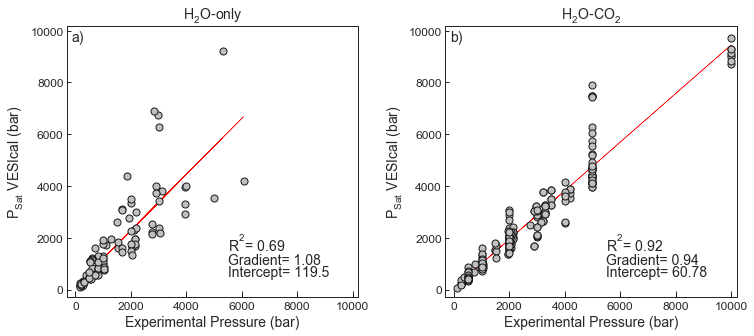

In [5]:
# This calculating a linear regression, and plots experimental pressures vs. saturation pressures (all data)
######################## H2O only experiments
X_Test1=satPs_wtemps_Iacono_H2Ocal['Press'] 
Y_Test1=satPs_wtemps_Iacono_H2Ocal['SaturationP_bars_VESIcal']
mask_Test1 = (X_Test1>-1) & (Y_Test1>-1) # This gets rid of Nans
X_Test1noNan=X_Test1[mask_Test1].values.reshape(-1, 1)
Y_Test1noNan=Y_Test1[mask_Test1].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test1noNan,Y_Test1noNan)
Y_pred_Test1=lr.predict(X_Test1noNan)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5)) # adjust dimensions of figure here
ax1.plot(X_Test1noNan,Y_pred_Test1, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax1.scatter(satPs_wtemps_Iacono_H2Ocal['Press'], satPs_wtemps_Iacono_H2Ocal['SaturationP_bars_VESIcal'],  s=50, edgecolors='k', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 1))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 2))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test1noNan, Y_pred_Test1), 2)) 

ax1.text(5500, 1500, R, fontsize=14)
ax1.text(5500, 1000, G, fontsize=14)
ax1.text(5500, 500, I,  fontsize=14)

################### Mixed H2O CO2 experiments

X_Test2=satPs_wtemps_Iacono_cal['Press'] 
Y_Test2=satPs_wtemps_Iacono_cal['SaturationP_bars_VESIcal']
mask_Test2 = (X_Test2>-1) & (Y_Test2>-1) # This gets rid of Nans
X_Test2noNan=X_Test2[mask_Test2].values.reshape(-1, 1)
Y_Test2noNan=Y_Test2[mask_Test2].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test2noNan,Y_Test2noNan)
Y_pred_Test2=lr.predict(X_Test2noNan)
ax2.plot(X_Test2noNan,Y_pred_Test2, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax2.scatter(satPs_wtemps_Iacono_cal['Press'], satPs_wtemps_Iacono_cal['SaturationP_bars_VESIcal'],  s=50, edgecolors='k', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 2))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 2))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test2noNan, Y_pred_Test2), 2)) 

ax2.text(5500, 500, I, fontsize=14)
ax2.text(5500, 1000, G, fontsize=14)
ax2.text(5500, 1500, R, fontsize=14)


ax1.set_xlabel('Experimental Pressure (bar)', fontsize=14)
ax1.set_ylabel('P$_{Sat}$ VESIcal (bar)', fontsize=14)
ax2.set_xlabel('Experimental Pressure (bar)', fontsize=14)
ax2.set_ylabel('P$_{Sat}$ VESIcal (bar)', fontsize=14)
ax1.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax1.set_yticks([0, 2000, 4000, 6000, 8000, 10000])
ax2.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax2.set_yticks([0, 2000, 4000, 6000, 8000, 10000])
ax1.set_xlim([-300, 10200])
ax1.set_ylim([-300, 10200])
ax2.set_xlim([-300, 10200])
ax2.set_ylim([-300, 10200])
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)

ax1.text(-150, 9600, 'a)', fontsize=14)
ax2.text(-150, 9600, 'b)', fontsize=14)
ax1.set_title('H$_{2}$O-only',  fontsize=14)
ax2.set_title('H$_{2}$O-CO$_2$',  fontsize=14)
fig.savefig('IaconMarziano_Test1and2.png', transparent=True)



# Test 3 - Comparing Saturation pressures from the web app to VESIcal for compositions in the calibration dataset
- The major and volatile element concentrations and temperatures from the calibration dataset were used to calculate saturation pressures in the web app, and compared to those in VESIcal

In [7]:
myfile_web = v.ExcelFile('S3_Testing_Iacono-Marziano_et_al_2012.xlsx',  sheet_name='WebCalculator', input_type='wtpercent') # This sheet contains the pressures calculated using the web calculator
data_web = myfile_web.data
satPs_wtemps_Iacono_web= myfile_web.calculate_saturation_pressure(temperature="Temp", model='IaconoMarziano')
# Comparison plotted on combined figure with test 4. 

# Test 4 - Comparing Saturation pressures from the web app to VESIcal for synthetic data
- A synthetic dataset varying major element compositions, temperature, and volatile contents was run through the web app and VESIcal

In [8]:
myfile_synweb = v.ExcelFile('S3_Testing_Iacono-Marziano_et_al_2012.xlsx',  sheet_name='Synthetic', input_type='wtpercent') # This sheet contains the pressures calculated using the web calculator for a synthetic dataset
data_synweb = myfile_synweb.data
satPs_wtemps_Iacono_synweb= myfile_synweb.calculate_saturation_pressure(temperature="Temp", model='IaconoMarziano')

../../../VESIcal.py:5913: RuntimeWarning: Saturation pressure not found.
  satP = self.models[1].calculate_saturation_pressure(sample=sample,**kwargs)


## Plot for Test 3 and Test 4

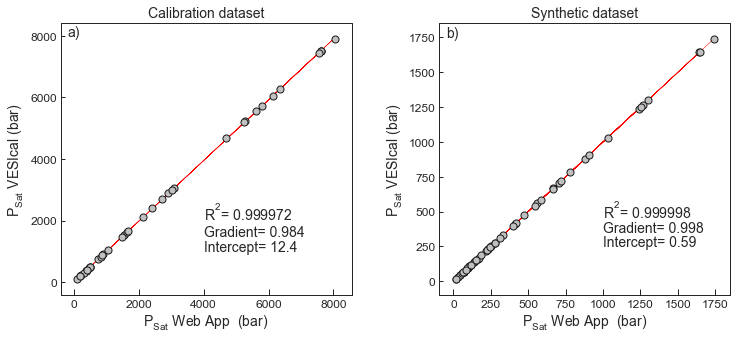

In [9]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5)) # adjust dimensions of figure here

# Comparison of web app and VESIcal for calibration dataset 
X_Test3=satPs_wtemps_Iacono_web['App calculator P bar'] # Convert MPa from their supplement to bars
Y_Test3=satPs_wtemps_Iacono_web['SaturationP_bars_VESIcal']
mask_Test3 = (X_Test3>-1) & (Y_Test3>-1) #& (XComb<7000) # This gets rid of Nans
X_Test3noNan=X_Test3[mask_Test3].values.reshape(-1, 1)
Y_Test3noNan=Y_Test3[mask_Test3].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test3noNan,Y_Test3noNan)
Y_pred_Test3=lr.predict(X_Test3noNan)


ax1.plot(X_Test3noNan,Y_pred_Test3, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax1.scatter(satPs_wtemps_Iacono_web['App calculator P bar'], satPs_wtemps_Iacono_web['SaturationP_bars_VESIcal'],  s=50, edgecolors='k', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 2))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 3))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test3noNan, Y_pred_Test3), 6)) 

ax1.text(4000, 1000, I, fontsize=14)
ax1.text(4000,1500, G, fontsize=14)
ax1.text(4000, 2000,  R, fontsize=14)
# Comparison of web app and VESIcal for the synthetic dataset
X_Test4=satPs_wtemps_Iacono_synweb['Press'] 
Y_Test4=satPs_wtemps_Iacono_synweb['SaturationP_bars_VESIcal']
mask_Test4 = (X_Test4>-1) & (Y_Test4>-1) #& (XComb<7000) # This gets rid of Nans
X_Test4noNan=X_Test4[mask_Test4].values.reshape(-1, 1)
Y_Test4noNan=Y_Test4[mask_Test4].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test4noNan,Y_Test4noNan)
Y_pred_Test4=lr.predict(X_Test4noNan)

ax2.plot(X_Test4noNan,Y_pred_Test4, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax2.scatter(X_Test4noNan, Y_Test4noNan,  s=50, edgecolors='k', facecolors='silver', marker='o', zorder=5)

I='Intercept= ' + str(np.round(lr.intercept_, 2))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 3))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test4noNan, Y_pred_Test4), 6)) 

ax2.text(1000, 250, I, fontsize=14)
ax2.text(1000, 350, G, fontsize=14)
ax2.text(1000, 450,  R, fontsize=14)

########################
ax1.set_xlabel('P$_{Sat}$ Web App  (bar)', fontsize=14)
ax1.set_ylabel('P$_{Sat}$ VESIcal (bar)', fontsize=14)
ax2.set_xlabel('P$_{Sat}$ Web App  (bar)', fontsize=14)
ax2.set_ylabel('P$_{Sat}$ VESIcal (bar)', fontsize=14)
ax1.set_yticks([0, 2000, 4000, 6000, 8000])
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)
ax1.set_title('Calibration dataset',  fontsize=14)
ax2.set_title('Synthetic dataset',  fontsize=14)
ax1.text(-200, 8000, 'a)', fontsize=14)
ax2.text(-50, 1750, 'b)', fontsize=14)
fig.savefig('IaconoMarziano_Test3and4.png', transparent=True)


# Test 5 -  Comparing dissolved volatiles from the web app to VESIcal
- The web app was used to calculate dissolved volatiles for a synthetic dataset with variable X$_{H2O}$ contents

In [10]:
myfile_synweb_cv = v.ExcelFile('S3_Testing_Iacono-Marziano_et_al_2012.xlsx',  sheet_name='Calculate_Dissolved_Volatiles', input_type='wtpercent') # This sheet has the dissolved volatiles calculated using the web calculator
data_synweb_cv = myfile_synweb_cv.data
dissolved_syn = myfile_synweb_cv.calculate_dissolved_volatiles(temperature="Temp", pressure="Press", X_fluid="XH2O", norm='fixedvolatiles', print_status=True, model='IaconoMarziano')

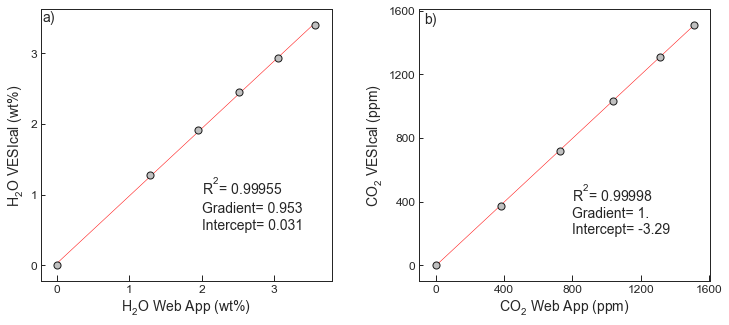

In [11]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5)) # adjust dimensions of figure here

# H2O
############
X_syn1=dissolved_syn['H2O(wt%)WebApp'].values.reshape(-1, 1) 
Y_syn1=dissolved_syn['H2O_liq_VESIcal'].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_syn1,Y_syn1)
Y_pred_syn1=lr.predict(X_syn1)


ax1.plot(X_syn1,Y_pred_syn1, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax1.scatter(dissolved_syn['H2O(wt%)WebApp'], dissolved_syn['H2O_liq_VESIcal'],  s=50, edgecolors='k', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 3))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_syn1, Y_pred_syn1), 5)) 

ax1.text(2, 0.5, I, fontsize=14)
ax1.text(2, 0.75, G, fontsize=14)
ax1.text(2, 1,  R, fontsize=14)


# CO2
###################################################### 
X_syn2=dissolved_syn['CO2(ppm)WebApp'].values.reshape(-1, 1) 
Y_syn2=10000*dissolved_syn['CO2_liq_VESIcal'].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_syn2,Y_syn2)
Y_pred_syn2=lr.predict(X_syn2)

ax2.plot(X_syn2,Y_pred_syn2, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax2.scatter(dissolved_syn['CO2(ppm)WebApp'], 10000*dissolved_syn['CO2_liq_VESIcal'],  s=50, edgecolors='k', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 2))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 3))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_syn2, Y_pred_syn2), 5)) 

plt.text(800, 200, I, fontsize=14)
plt.text(800, 300, G, fontsize=14)
plt.text(800, 400, R, fontsize=14)



########################

ax1.set_xlabel('H$_2$O Web App (wt%)', fontsize=14)
ax1.set_ylabel('H$_2$O VESIcal (wt%)', fontsize=14)
ax2.set_xlabel('CO$_2$ Web App (ppm)', fontsize=14)
ax2.set_ylabel('CO$_2$ VESIcal (ppm)', fontsize=14)
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)
ax1.set_yticks([0, 1, 2, 3])
ax2.set_yticks([0, 400, 800, 1200, 1600])
ax2.set_xticks([0, 400, 800, 1200, 1600])
ax1.text(-0.2,3.45, 'a)', fontsize=14)
ax2.text(-70, 1520, 'b)', fontsize=14)
fig.savefig('IaconoMarziano_Test5.png', transparent=True)